In [37]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd

In [39]:
import datetime as dt

In [40]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [41]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [43]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the result
percp_data=pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > '2017-08-06').\
                        group_by(Measurement.date).
                        order_by(Measurement.date).all())
percp_data

,date,prcp
0,2017-08-07,0.05
1,2017-08-08,0.34
2,2017-08-09,0.15
3,2017-08-10,0.07
4,2017-08-11,NaN
5,2017-08-12,0.14
6,2017-08-13,NaN
7,2017-08-14,0.22
8,2017-08-15,0.42
9,2017-08-16,0.42


<IPython.core.display.Javascript object>


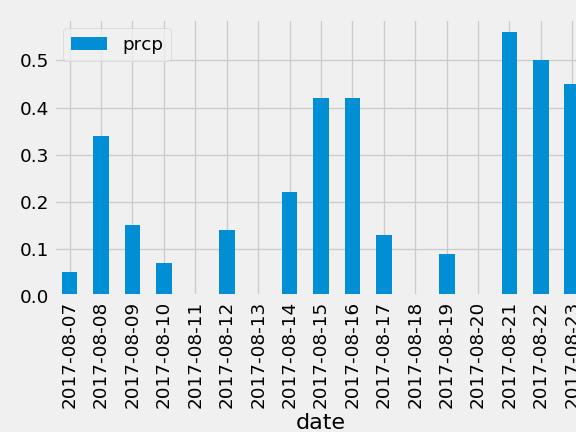

In [47]:
percp_data.set_index('date', inplace=True)
percp_data.plot.bar()
plt.tight_layout()
plt.show()


# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates

In [48]:
percp_data.describe()

,prcp
count,13.000000
mean,0.272308
std,0.181069
min,0.050000
25%,0.130000
50%,0.220000
75%,0.420000
max,0.560000


In [50]:
# How many stations are available in this dataset?
engine.execute('SELECT COUNT(station) FROM station').fetchall()

[(9,)]

In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.
